![Codenation](https://forum.codenation.com.br/uploads/default/original/2X/2/2d2d2a9469f0171e7df2c4ee97f70c555e431e76.png)

__Autor__: Kazuki Yokoyama (kazuki.yokoyama@ufrgs.br)

# Análise Exploratória de Dados

![eda](https://www.aiche.org/sites/default/files/images/webinar/shutterstock357106388.jpg)

A análise exploratória de dados (do inglês, EDA - _Exploratory Data Analysis_) é uma das fases mais importantes de todo processo de análise de dados. É nessa fase em que exploramos e conhecemos os nossos dados, utilizando de ferramentas estatísticas e de visualização. Sobre a EDA, podemos dizer que:

* É um processo iterativo e cíclico.
* Geramos questões que julgamos relevantes para o negócio.
* Buscamos respondê-las através de gráficos, manipulação e estatísticas sobre os dados.
* Refinamos as questões e as utilizamos para gerar novas questões pertinentes.

É importante que desempenhemos essa fase com bastante cuidado antes de realizarmos qualquer tipo mais avançado de modelagem. Uma EDA mal executada pode levar a maiores dificuldades na modelagem, desvio das questões mais importantes e que agreguem mais valor, e na pior das hipóteses, a total invalidação da análise (por exemplo, se os dados disponíveis forem totalmente incapazes de responder as questões levantadas).

Uma parte crucial, mas que geralmente é negligenciada por quem está começando empolgado, é estatística. A estatística é a base teórica da ciência dos dados, sem ela não teríamos como desenvolver com segurança nenhum dos modelos ou algoritmos que fazemos uso hoje.

Como cientistas de dados, nossa missão é contar histórias utilizando dados,  e é muito difícil contar uma boa história a partir dos dados sem usar estatística. Para resumir:

> _“It is easy to lie with statistics. It is hard to tell the truth without it.”_ ― Andrejs Dunkels.

Vamos fundamentar um pouco nossas bases em estatística e ver algumas das principais técnicas para a EDA.

## Importação das bibliotecas

Vamos importar as bibliotecas necessárias:

In [0]:
import numpy as np
import pandas as pd

# Visualização de dados.
import matplotlib.pyplot as plt # Convenção de alias para o matplotlib
import seaborn as sns # Convenção de alias para o seaborn.

from math import floor

In [0]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [0]:
np.random.seed(42)

## Tabelas de frequência

O nosso primeiro ponto de parada são as tabelas de frequência. Considere o seguinte conjunto de dados:

In [0]:
ages = pd.Series(np.random.randint(18, 38, 200))

ages[:10] # Mostra as 10 primeiras observações.

0    24
1    37
2    32
3    28
4    25
5    24
6    36
7    28
8    28
9    21
dtype: int64

Vejamos como os valores gerados se distribuem pelas idades:

In [0]:
ages.value_counts().sort_index()

18    13
19    12
20    12
21    10
22    10
23     8
24    15
25    11
26    11
27     7
28     8
29    14
30     8
31     6
32    13
33     7
34    11
35     5
36     9
37    10
dtype: int64

Vamos construir nossa tabela de frequência.

Uma tabela de frequência de um conjunto de dados com $n$ observações geralmente apresenta as __classes de dados__ (intervalos onde podemos classificar os dados), a __quantidade absoluta__ ($n_{i}$) de elementos em cada classe, a __frequência relativa__ ($f_{i}$) dessa classe, ou seja, a fração de elementos dessa classe em relação à quantidade total de elementos, e a __frequência acumulada__ ($f_{ac}$), ou seja, a soma das frequências relativas até aquela classe. Utilizamos o índice $i$ para denotar a classe.

Começamos pela determinação do número de classes, $k$, que iremos particionar os nossos dados. Algumas formas existem:

* $k = 1 + 3.3 \log(n)$
* $ k = $ menor valor inteiro tal que $2^{k} \geq n$
* $k = \sqrt{n}$

In [0]:
k = 5 # Aqui, utilizaremos cinco classes.

In [0]:
print(f"min: {ages.min()}")
print(f"max: {ages.max()}")

min: 18
max: 37


In [0]:
amplitude = ages.max() - ages.min() # Variação de valores dentro do data set.

amplitude

19

In [0]:
width = amplitude / 5 # Largura de cada classe.

round(width) # 3.8 arredondado.

4.0

In [0]:
def count(start, stop):
  # Utiliza closure de ages.
  return ((ages >= start) & (ages < stop)).sum() # Start é inclusive, stop é exclusive.

In [0]:
ages_freq = pd.DataFrame([
    ["18 ⊢ 22", count(18, 22)],
    ["22 ⊢ 26", count(22, 26)],
    ["26 ⊢ 30", count(26, 30)],
    ["30 ⊢ 34", count(30, 34)],
    ["34 ⊢ 38", count(34, 38)]
    
], columns=["Idade", "ni"])

ages_freq["fi"] = ages_freq["ni"]/200

ages_freq["fac"] = ages_freq["fi"].cumsum()

ages_freq

,Idade,ni,fi,fac
0,18 ⊢ 22,47,0.235,0.235
1,22 ⊢ 26,44,0.220,0.455
2,26 ⊢ 30,40,0.200,0.655
3,30 ⊢ 34,34,0.170,0.825
4,34 ⊢ 38,35,0.175,1.000


## Estatística descritiva univariada

Agora adentramos de vez o universo da estatística. Nossa primeira parada é a análise univariada i.e. de apenas uma variável.

Estamos interessados em estabelecer medidas que resumem quantitativamente a nossa variável. Essas medidas nos dirão sobre a tendência de centralidade dos dados, sua dispersão etc.

Antes de prosseguirmos, é razoável esclarecermos brevemente alguns conceitos da estatística:

* __População__: conjunto total das entidades sob análise. Geralmente não temos acesso a toda população.
* __Amostra__: porção observável da população que utilizamos na análise.
* __Estatística__: qualquer função matemática dos dados. Por exemplo, valor máximo, mínimo, média, variância etc.
* __Estimadores__: qualquer função matemática que tente estimar estatísticas da população a partir da amostra.
* __Estimativas__: valor numérico resultado da aplicação de um estimador em uma amostra.

### Média

A média é uma das principais medidas de tendência central dos dados.  Como geralmente desconhecemos toda população, não conseguimos medir diretamente sua média $\mu$. Para estimarmos o valor dessa estatística populacional, utilizamos estimadores.

O melhor estimador $\hat{\mu}$ da média populacional (discreta) $\mu$ é dado por:

$$\hat{\mu} = \bar{X} = \sum_{X} X p(X)$$

Que nada mais é do que a média aritmética de todos os dados da amostra (ponderados pelas suas frequência relativas).

Podemos calcular o valor numérico desse estimador, i.e. obter uma estatística, quando dispormos dos dados da amostra:

$$\bar{x} = \sum_{x} x p(x)$$

Posto de outra forma, a média pode ser calculada como:

$$\bar{x} = \frac{1}{n} \sum_{i} x_{i}$$

Seguindo as convenções usuais, usamos:

* "Chapéu" (_hat_) sobre uma variável para denotar que ela é um estimador de algum parâmetro populacional (e.g., $\hat{\mu}$).
* Barra horizontal para denotar média amostral ($\bar{X}$ e $\bar{x}$).
* Letras maiúsculas para denotar que é uma variável aleatória (e.g., $X$ e $\bar{X}$).
* Letras minúsculas para denotar valores numéricos computados a partir de uma amostra ($x$ e $\bar{x}$).

Seguindo com os dados do nosso exemplo:

In [0]:
mean = ages.mean()

mean

26.86

Os dados em `ages` constituem a nossa amostra e essa média reflete a média amostral, que é uma estimativa da verdadeira média populacional. Certamente, se tivermos acesso à população, ou seja, às idades de todas pessoas, e calcularmos a média populacional, ela seria um pouco diferente do valor que acabamos de encontrar.

Um conceito muito importante da Estatística é o de viés. Para entender o que isso significa, acompanhe o seguinte raciocínio para o caso da média:

1. Pegamos uma primeira amostra de tamanho $n$, $\Omega_{1,n}$, e calculamos sua média amostral $\bar{x}_{1}$.
2. Pegamos uma segunda amostra de tamanho $n$, $\Omega_{2,n}$, e calculamos sua média amostral $\bar{x}_{2}$.
3. Repetimos isso para *todas* amostras de tamanho $n$ dessa população, obtendo todas médias amostrais $\bar{x}_{1}$, $\bar{x}_{2}$, ...

E agora nos perguntamos, a média dessas médias é igual à verdadeira média populacional?

Se a resposta for sim, dizemos que o estimador que deu origem a essas médias amostrais é não viesado. Caso contrário, ele é viesado.

Em termos matemáticos, dizemos que, se o estimador for não viesado, o seu valor esperado (ou esperança matemática), $\mathbb{E}$, é igual ao parâmetro populacional:

$$\mathbb{E}[\bar{X}] = \mu$$

Esse conceito se aplica igualmente a qualquer estimador.

### Variância

A variância é uma medida de dispersão dos dados. Ela mede o quão afastados os dados encontram-se da média. Quanto maior a variância, mais afastados os dados encontram-se da média.

A variância populacional, $\sigma^{2}$, é calculada através da fórmula:

$$\sigma^{2} = \frac{1}{N} \sum_{i} (x_{i} - \mu)^{2}$$

onde $N$ é o tamanho da população e $\mu$ é a média populacional.

No entanto, quando não possuímos a população (e portanto desconhecemos $\mu$), devemos estimar essa variância através de uma amostra. Para isso precisamos de um bom estimador para a variância populacional. Esse estimador é dado por:

$$\hat{\sigma}^{2} = s^{2} = \frac{1}{n-1} \sum_{i} (x_{i} - \bar{x})^{2}$$

onde $n$ é o tamanho da amostra e $\bar{x}$ é a média amostral como definida acima.

Notem o fator $1/(n-1)$ em vez de $1/n$. Esse fator é conhecido como fator de correção de Bessel e o motivo é justamente o viés que comentamos acima:

$$\mathbb{E}\left[\frac{1}{n} \sum_{i} (x_{i} - \bar{x})^{2}\right] \neq \sigma^{2}$$

ou seja, utilizando o fator $1/n$, teríamos um estimador viesado para a variância populacional, o que não é desejado. Porém

$$\mathbb{E}\left[\frac{1}{n-1} \sum_{i} (x_{i} - \bar{x})^{2}\right] = \sigma^{2}$$

Em palavras, o estimador com a correção de Bessel é não viesado.

É interessante notar que em termos de variáveis aleatórias (V.A), a variância pode ser definida como:

$$\text{Var}[X] = \mathbb{E}[(X - \mathbb{E}[X])^{2}]$$

da onde surge a fórmula clássica para seu cálculo:

$$\text{Var}[X] = \mathbb{E}[X^{2}] - \mathbb{E}[X]^{2}$$

Em palavras, a variância também pode ser computada como a diferença entre o valor esperado da V.A ao quadrado e o quadrado do valor esperado da V.A.

Seguindo com os dados do nosso exemplo:

Podemos calcular a variância manualmente com a fórmula acima:

In [0]:
np.power(ages - ages.mean(), 2).sum() / (ages.size-1)

33.81949748743718

Ou utilizar o método `var()` das `Series` do pandas:

In [0]:
variance = ages.var() # Usando o fator de correção de Bessel 1/(n-1).

variance

33.819497487437175

### Desvio padrão

O desvio padrão (_standard deviation_) é a raiz quadrada da variância. Toda discussão em relação à variância populacional x amostral se aplica, _mutandi mutandis_, ao desvio padrão.

O desvio padrão amostral $s$ pode ser calculador por:

$$s = \sqrt{s^{2}} = \sqrt{\frac{1}{n-1} \sum_{i} (x_{i} - \bar{x})^{2}}$$

Notem que variância e desvio padrão são sempre grandezas não negativas ($s^{2}$, $s \in \mathbb{R}_{\geq 0}$).

In [0]:
std_dev = ages.std()

std_dev

5.815453334645303

### Quantis

Média, variância e desvio padrão não são as únicas medidas de centralidade e dispersão dos dados univariadas. Uma outra classe de estatísticas muito úteis durante a EDA são os quantis.

Quantis são pontos que dividem uma distribuição de probabilidade em partições de tamanhos iguais. Abstrato, não?

Vamos analisar os quantis do nosso exemplo.

O primeiro passo é sempre ordenar os dados:

In [0]:
sorted_ages = ages.sort_values()

sorted_ages = sorted_ages.reset_index(drop=True) # Reseta os índices para começar em 0 e remove a coluna index.

sorted_ages[:20]

0     18
1     18
2     18
3     18
4     18
5     18
6     18
7     18
8     18
9     18
10    18
11    18
12    18
13    19
14    19
15    19
16    19
17    19
18    19
19    19
dtype: int64

Um q-quantil divide os dados (já ordenados) em q partições de tamanhos iguais.

Então, por exemplo:
  
O 2-quantil, ou mediana, divide os dados em duas partes iguais. Como nossos índices vão de 0 a 199 (são 200 elementos), a metade encontra-se entre o índice 99 e o índice 100. Neste caso, devemos tirar a média entre os valores de índice 99 e 100 para obter o 2-quantil:

In [0]:
median = (sorted_ages[99] + sorted_ages[100]) / 2

median

26.0

O pandas tem um método para achar quantis de forma simples:

In [0]:
ages.quantile() # Mediana é o default.

26.0

Podemos então dizer que a mediana é o valor que divide os dados ordenados em duas partes iguais (50% dos valores são menores que a mediana e 50% dos valores são maiores que a mediana).

Se tivermos um número ímpar (2n+1) de elementos, a mediana é simplesmente o valor que separa n elementos menores que ela, e n elementos maiores que ela.

Se tivermos um número par (2n) de elementos, a mediana é a média entre os elementos de índice n-1 e n+1, tal como fizemos acima.

Os 4-quantis dividem os dados ordenados em 4 partes iguais. Dessa vez, os índices dos quantis serão:

* Entre 49 e 50.
* Entre 99 e 100.
* Entre 149 e 150.

Chamamos cada um desses pontos de quartis (Q1, Q2 e Q3). Note que o segundo quartil, Q2, é exatamente igual a mediana. Também chamamos Q1 de quartil inferior e Q3 de quartil superior.

In [0]:
q1 = (sorted_ages[49] + sorted_ages[50]) / 2
q2 = (sorted_ages[99] + sorted_ages[100]) / 2
q3 = (sorted_ages[149] + sorted_ages[150]) / 2

q1, q2, q3

(22.0, 26.0, 32.0)

Ou com pandas:

In [0]:
ages.quantile((0.25, 0.5, 0.75))

0.25    22.0
0.50    26.0
0.75    32.0
dtype: float64

Os 10-quantis, ou decis, dividem os dados ordenados em 10 partes iguais e o 100-quantis, ou percentis, dividem os dados em 100 partes iguais.

Notem que há relações entre os quantis. Por exemplo,

* A mediana é também o segundo quartil, quinto decil e 50º percentil.
* O primeiro quartil (Q1) é também o 25º percentil.
* O terceiro quartil (Q3) é também o 75º percentil.
* E assim por diante.

Existem também outros quantis para divisões em 3 (terciles), 5 (quintiles), 8 (octiles) etc. A lógica é sempre a mesma.

### IQR

O IQR (do inglês, _Interquartile Range_), ou Intervalo Interquartil, é a diferença entre o terceiro e primeiro quartis: $\text{IQR} = Q3 - Q1$.

O IQR é uma medida de dispersão robusta utilizada, por exemplo, quando os dados contêm muitos _outliers_ por ser menos sensível às variações nos extremos do conjunto.

Para o nosso _data set_ anterior, calculamos o IQR como:

In [0]:
iqr = q3 - q1

iqr

10.0

Ou usando o método `quantile()` do pandas:

In [0]:
ages.quantile(0.75) - ages.quantile(0.25)

10.0

O IQR tem um papel interessante na análise do gráfico _box plot_ que veremos mais adiante.

### _Skewness_

_Skewness_, ou assimetria em português, é uma medida de... simetria. Ela nos diz o quão simétrica é a distribuição dos dados em torno da média, e junto com a curtose (_kurtosis_) que veremos em seguida, é uma medida muito boa para informar a aparência ou forma da distribuição dos dados.

A assimetria, $\gamma_{1}$, é definida como o terceiro momento padronizado, ou seja:

$$\gamma_{1} = \frac{\mathbb{E}[(X - \mu)^{3}]}{\mathbb{E}[(X - \mu)^{2}]^{3/2}} = \frac{\mu_{3}}{\sigma^{3}}$$

onde $\mu_{3}$ é o terceiro momento central e $\sigma$ é o desvio padrão.

Na sua forma amostral, a assimetria pode ser calculada como:

$$g_{1} = \frac{1/n \sum_{i} (x_{i} - \bar{x})^{3}}{\left(1/n \sum_{i} (x_{i} - \bar{x})^{2}\right)^{3/2}}$$

Note que também é comum utilizar o fator de Bessel ($1/(n-1)$) em vez de $1/n$ no denominador da equação acima. Ambas as formas levam a estimadores viesados da assimetria.

> Obs.: Existem outras definições de _skewness_ na literatura, mas que não abordaremos aqui.

Valores zero da _skewness_ indicam que os dados têm distribuição simétrica em relação ao centro. Valores positivos indicam que a distribuição tem assimetria positiva, ou seja, a cauda direita é mais longa do que a cauda esquerda. Valores negativos indicam que a distribuição tem assimetria negativa, ou seja, a cauda esquerda é mais longa do que a cauda direita. Isso é ilustrado abaixo:

![skewness](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

Vamos calcular a assimetria do nosso _data set_:

In [0]:
skewness = ages.skew()

skewness

0.1397571684895468

Como o valor acima deu positivo, a distribuição possui leve assimetria à direita (cauda maior à direita ou assimetria positiva), parecida com a primeira curva da imagem acima. Isso é corroborado pelo fato de que a média foi superior à mediana:

In [0]:
mean > median

True

### _Kurtosis_

_Kurtosis_, ou curtose em português, também é uma medida que nos ajuda a dar forma à distribuição dos dados. A curtose, diferente da assimetria, tenta capturar em uma medida a forma das caudas da distribuição. Ela também possui diferentes definições, mas podemos utilizar a seguinte versão:

$$\text{Kurt}[X] = \frac{\mathbb{E}[(X - \mu)^{4}]}{\mathbb{E}[(X - \mu)^{2}]^{2}} = \frac{\mu_{4}}{\sigma^{4}}$$

ou seja, a curtose como o quarto momento padronizado.

A curtose amostral pode ser obtida com:

$$g_{2} = \frac{1/n \sum_{i} (x_{i} - \bar{x})^{4}}{\left(1/n \sum_{i} (x_{i} - \bar{x})^{2}\right)^{2}} - 3$$

Com o desconto de 3 para fácil comparação com a curtose da distribuição normal padronizada, que possui curtose = 3.

Quando $g_{2} > 0$, temos o caso de uma distribuição leptocúrtica, onde as caudas são mais pesadas e o pico da distribuição mais alto.

Quando $g_{2} < 0$, temos o caso de uma distribuição platicúrtica, onde as caudas são menos pesadas e a distribuição é mais achatada.

![kurtosis](https://qph.fs.quoracdn.net/main-qimg-940a4be2e2837d71e6b2f24c61aa103f)

No entanto, a interpretação da curtose é bastante sútil. O artigo [On the Meaning and Use of Kurtosis](http://www.columbia.edu/~ld208/psymeth97.pdf) lança luz sobre essa estatística de forma mais completa e rigorosa.

Vamos analisar os nossos dados de idades.

In [0]:
ages.kurt()

-1.1724752979347557

A curtose negativa indica que temos uma distribuição platicúrtica, o que faz sentido. Os dados foram gerados a partir de uma distribuição uniforme discreta no intervalo entre 18 e 37, inclusive. A distribuição uniforme é um grande exemplo de distribuição platicúrtica.

## Estatística descritiva multivariada

Agora que já vimos o caso univariado, vamos dar uma olhada no caso multivariado. Na análise multivariada, consideramos duas ou mais variáveis simultaneamente, e como elas se relacionam. Estamos interessados agora em verificar como a variação de uma variável influencia as demais e quais seus efeitos conjuntos.

Começamos falando dos coeficientes de correlação.

Primeiro, devemos lembrar que não existe somente uma medida de correlação. Aqui analisaremos dois coeficientes de correlação bastante populares: Pearson e Spearman.

### Correlação de Pearson

O coeficiente de correlação de Pearson é talvez o mais popular de todos. Dadas duas variáveis aleatórias $X$ e $Y$, o coeficiente de correlação de Pearson, $\rho_{X, Y}$, é definido como:

$$\rho_{X, Y} = \frac{\text{cov}(X, Y)}{\sigma_{X} \sigma_{Y}} = \frac{\mathbb{E}[(X - \mu_{X})(Y - \mu_{Y})]}{\sqrt{\mathbb{E}[(X - \mu_{X})^{2}]\mathbb{E}[(Y - \mu_{Y})^{2}]}}$$

onde, como já vimos, $\mu_{X} = \mathbb{E}[X]$ e $\mu_{Y} = \mathbb{E}[Y]$.

Essa fórmula nos diz como calcular a correlação se conhecermos a população, e consequentemente as médias populacionais $\mu_{X}$ e $\mu_{Y}$. Como esse quase nunca é o caso, devemos saber calcular o coeficiente de correlação de Pearson amostral, $r_{X, Y}$, como segue:

$$r_{X, Y} = \frac{\sum_{i}(x_{i} - \bar{x})\sum_{i}(y_{i} - \bar{y})}{\sqrt{\sum_{i}(x_{i} - \bar{x})^{2}\sum_{i}(y_{i} - \bar{y})^{2}}}$$

onde $\bar{x} = 1/n \sum_{i} x_{i}$ e $\bar{y} = 1/n \sum_{i} y_{i}$.

Como deve ser evidente a partir das fórmulas, a correlação possui as propriedades de simetria ($\rho_{X, Y} = \rho_{Y, X}$) e identidade ($\rho_{X, X} = 1$).

A correlação de Pearson varia entre -1 e 1, inclusive, obtendo o valor -1 ou 1 quando as variáveis possuem uma relação perfeitamente linear. Quanto mais próximo de -1, mais negativamente correlacionadas estão as variáveis, ou seja, o crescimento no valor de uma variável é acompanhado de uma decrescimento no valor da outra variável. Por outro lado, quanto mais próximo de 1, mais positivamente correlacionadas elas estão: o crescimento em uma é acompanhado pelo crescimento na outra.

Importante notar que a correlação de Pearson é uma medida de correlação __linear__. Em outras palavras, ela é incapaz de capturar relações não lineares. É possível que duas variáveis apresentem uma relação bem definida, mas que não seja linear, levando a $\rho_{X, Y} = 0$ (estatisticamente zero).

**Importantíssimo notar que correlação não implica em causalidade. De forma resumida, podemos dizer que independência implica em correlação zero, mas correlação zero não implica necessariamente em independência.**

Vamos ver isso na prática.

Vamos começar pelo caso onde $X$ e $Y$ são totalmente independentes. Nesse caso, vamos gerar $X$ e $Y$ a partir de processos independentes (apesar de serem da mesma distribuição de probabilidade):

In [0]:
X = np.random.rand(100) # 100 valores de X ~ U(0, 1).

Y = np.random.rand(100) # 100 valores de Y ~ U(0, 1).

XY = pd.DataFrame({"X": X, "Y": Y})

XY.head(5)

,X,Y
0,0.711150,0.256207
1,0.809501,0.611514
2,0.348666,0.081594
3,0.096177,0.005185
4,0.940523,0.627894


O _scatter plot_ abaixo evidencia a independência entre as variáveis: não há aparente relação entre $X$ e $Y$.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


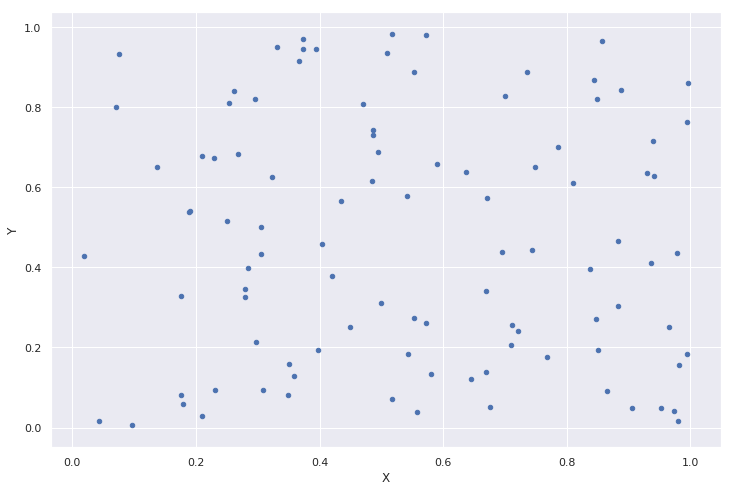

In [0]:
XY.plot(x="X", y="Y", kind="scatter");

O método `corr()` do `DataFrame` nos permite calcular diversos coeficientes de correlação, especificando o parâmetro `method`. Aqui utilizaremos `method="pearson"` para calcular $r_{X, Y}$:

In [0]:
XY.corr(method="pearson")

,X,Y
X,1.000000,-0.049922
Y,-0.049922,1.000000


Note como no caso de independência $\rho_{X, Y} \approx 0$. Dizemos que $\rho_{X, Y}$ é *estatisticamente* zero, apesar de não o ser numericamente. Essa pequena diferença em relação a zero deve-se ao acaso.

Existem testes de hipóteses para verificar a nulidade estatística da correlação, mas não o faremos aqui. Você pode consultar mais sobre inferência sobre essa estatística [aqui](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#Inference).

Note também como $\rho_{X, X} = \rho_{Y, Y} = 1$.

Agora vamos criar uma relação de dependência não linear entre $X$ e $Y$ (sendo $Y = \sqrt{1 - X^{2}}$):

In [0]:
X_circ = np.random.uniform(-1, 1, 100)
Y_circ = np.sqrt(1 - np.power(X_circ, 2))

XY_circ = pd.DataFrame({"X": X_circ, "Y": Y_circ})

XY_circ.head(5)

,X,Y
0,-0.922074,0.387014
1,0.236508,0.971630
2,-0.326892,0.945062
3,0.311445,0.950264
4,-0.229207,0.973378


O _scatter plot_ a seguir mostra que há uma relação clara entre $X$ e $Y$ na forma de uma semicircunferência.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


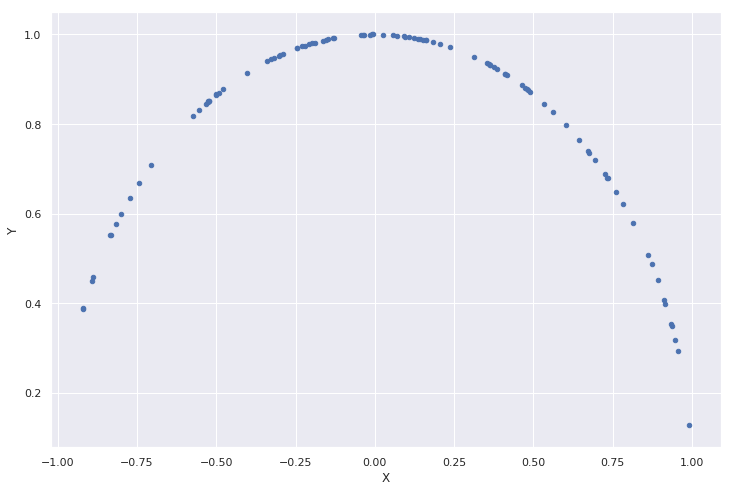

In [0]:
XY_circ.plot(x="X", y="Y", kind="scatter");

Porém o coeficiente de correlação de Pearson mostrado abaixo também é muito próximo de zero.

Por construção, as variáveis não possuem correlação linear alguma. No entanto, é possível que um teste de hipóteses sobre essa estatística nos diga o contrário.

> Lição: nunca confie somente em testes de hipóteses (e vocês se depararão com muitos deles). Sempre explore os dados de forma visual ou por outros meios também.

In [0]:
XY_circ.corr(method="pearson")

,X,Y
X,1.00000,-0.22143
Y,-0.22143,1.00000


Por fim, vejamos um caso onde existe correlação linear real entre as variáveis.

Nesse caso, criamos $Y$ como uma função linear de $X$ acrescido de um ruído normalmente distribuído: $Y = 2 X + \varepsilon$, onde $\varepsilon \sim N(0, 0.04)$:

In [0]:
Y_dep = 2 * X + np.random.normal(0, 0.2, 100)

XY_dep = pd.DataFrame({"X": X, "Y": Y_dep})

XY_dep.head(5)

,X,Y
0,0.711150,1.042950
1,0.809501,1.738821
2,0.348666,0.663718
3,0.096177,0.249388
4,0.940523,1.786663


O _scatter plot_ agora mostra que há uma relação linearmente positiva entre $X$ e $Y$: quando $X$ cresce, $Y$ também cresce.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


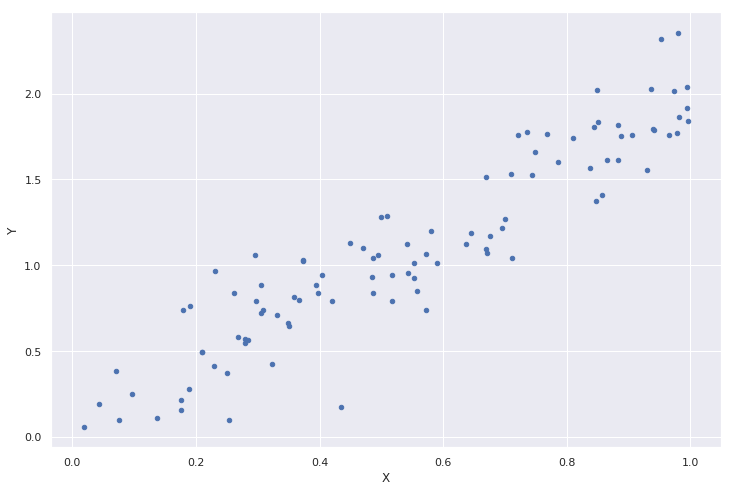

In [0]:
XY_dep.plot(x="X", y="Y", kind="scatter");

A correlação de Pearson agora é bastante alta, próxima de 1, comprovando a existência da relação linear entre as variáveis.

In [0]:
XY_dep.corr(method="pearson")

,X,Y
X,1.000000,0.928313
Y,0.928313,1.000000


### Correlação de Spearman

O coeficiente de correlação de Spearman é definido como o coeficiente de correlação de Pearson entre os postos (posições) das variáveis originais:

$$r_{\text{Spearman}} = \rho_{\text{rg}_{X}, \text{rg}_{Y}}$$

onde $\text{rg}_{X}$ são os postos (ou posições) dos dados em $X$.

Os postos são os índices dos elementos quando eles estão ordenados.

O coeficiente de correlação de Spearman tem as mesmas características e propriedades do coeficiente de correlação de Pearson, apenas a interpretação muda.

Na correlação de Spearman, avaliamos a relação monótona entre as variáveis, ou seja, se a tendência de uma variável em crescer (ou diminuir) faz com que a outra variável também tenda a crescer (ou diminuir).

Essa correlação atinge -1 se sempre que uma variável aumenta, a outra diminui. Ela atinge 1 se sempre que uma variável aumenta, a outra também aumenta.

Note que ela consegue capturar correlações mesmo entre variáveis de relação não linear, desde que a relação monótona seja satisfeita.

Para tornar o conceito de posto mais claro, vamos ver um exemplo. Considere as variáveis $X$ e $Y$ abaixo:

In [0]:
X = np.random.rand(10) # 10 valores de X ~ U(0, 1).

Y = np.random.rand(10) # 10 valores de Y ~ U(0, 1).

XY = pd.DataFrame({"X": X, "Y": Y})

XY

,X,Y
0,0.515236,0.355991
1,0.973110,0.894217
2,0.601935,0.128748
3,0.223849,0.330100
4,0.821791,0.321583
5,0.345083,0.092291
6,0.347619,0.481145
7,0.031805,0.687785
8,0.548715,0.511657
9,0.534424,0.156978


Agora vamos obter os postos das colunas `X` e `Y`. Para isso, vamos fazer _fancy indexing_ utilizando os índices das variáveis ordenadas para criar as novas colunas `RankX` e `RankY`:

In [0]:
XY.loc[XY["X"].sort_values().index, "RankX"] = np.arange(XY.shape[0])
XY.loc[XY["Y"].sort_values().index, "RankY"] = np.arange(XY.shape[0])

XY["RankX"] = XY["RankX"].astype(int)
XY["RankY"] = XY["RankY"].astype(int)

XY

,X,Y,RankX,RankY
0,0.515236,0.355991,4,5
1,0.973110,0.894217,9,9
2,0.601935,0.128748,7,1
3,0.223849,0.330100,1,4
4,0.821791,0.321583,8,3
5,0.345083,0.092291,2,0
6,0.347619,0.481145,3,6
7,0.031805,0.687785,0,8
8,0.548715,0.511657,6,7
9,0.534424,0.156978,5,2


Agora vamos verificar que o coeficiente de correlação de Spearman das variáveis...

In [0]:
XY.loc[:, ["X", "Y"]].corr(method="spearman")

,X,Y
X,1.000000,0.042424
Y,0.042424,1.000000


 é igual ao coeficiente de correlação de Pearson aplicado aos seus postos:

In [0]:
XY.loc[:, ["RankX", "RankY"]].corr(method="pearson")

,RankX,RankY
RankX,1.000000,0.042424
RankY,0.042424,1.000000


### Mapa de correlação

Agora que sabemos medir correlação de duas formas diferentes entre duas variáveis, podemos expandir esse raciocínio para mais variáveis.

Um mapa de correlação é simplesmente uma matriz $M$, simétrica, onde cada elemento $M_{ij}$ representa a correlação entre as variáveis (colunas) $X_{i}$ e $X_{j}$ do _data set_, ou seja, $M_{ij} = \rho_{X_{i}, X_{j}}$.

Vamos demonstrar isso com um exemplo. Considere o _data set_ abaixo:

In [0]:
dataframe = pd.DataFrame(np.random.rand(100, 10), columns=["X" + str(i) for i in range(10)])

# Vamos criar algumas dependências.
dataframe["X1"] = dataframe["X0"] + np.random.normal(0, 0.4, 100)
dataframe["X5"] = 4 * dataframe["X2"] + np.random.normal(0, 0.4, 100)
dataframe["X7"] = -2 * dataframe["X5"] + np.random.normal(0, 0.4, 100)
dataframe["X9"] = 10 * dataframe["X4"] + np.random.normal(0, 0.1, 100)

dataframe.head(5)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0.377286,0.319881,0.868301,0.084517,0.597278,3.640487,0.536591,-7.759413,0.236117,6.061414
1,0.531266,0.319801,0.062341,0.147739,0.133117,0.208639,0.844441,-0.433174,0.030472,1.261903
2,0.354147,-0.426301,0.104869,0.737405,0.182284,0.192600,0.840710,-0.774699,0.535336,1.816186
3,0.342927,0.091355,0.355104,0.648823,0.479582,1.264650,0.736822,-3.238344,0.586535,4.820349
4,0.378773,0.048785,0.899647,0.607555,0.244353,4.146366,0.330348,-7.971354,0.007534,2.559554


In [0]:
correlation_matrix = dataframe.corr(method="pearson")

correlation_matrix

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
X0,1.000000,0.607618,0.019169,0.161379,0.079330,0.000612,-0.007285,-0.008688,0.056017,0.079040
X1,0.607618,1.000000,0.096882,0.152748,-0.035719,0.046953,-0.058457,-0.046430,-0.000487,-0.038478
X2,0.019169,0.096882,1.000000,0.078102,0.065507,0.951475,-0.010447,-0.937763,-0.063503,0.064046
X3,0.161379,0.152748,0.078102,1.000000,-0.011615,0.042354,-0.007169,-0.038423,0.092594,-0.014459
X4,0.079330,-0.035719,0.065507,-0.011615,1.000000,0.064756,0.013091,-0.058337,0.093100,0.999353
X5,0.000612,0.046953,0.951475,0.042354,0.064756,1.000000,-0.058577,-0.985157,-0.067745,0.061762
X6,-0.007285,-0.058457,-0.010447,-0.007169,0.013091,-0.058577,1.000000,0.084717,0.081108,0.011979
X7,-0.008688,-0.046430,-0.937763,-0.038423,-0.058337,-0.985157,0.084717,1.000000,0.081302,-0.055527
X8,0.056017,-0.000487,-0.063503,0.092594,0.093100,-0.067745,0.081108,0.081302,1.000000,0.094926
X9,0.079040,-0.038478,0.064046,-0.014459,0.999353,0.061762,0.011979,-0.055527,0.094926,1.000000


Podemos visualizar essa matriz como um mapa de calor para termos _insights_ ainda mais rápidos sobre as correlações entre as variáveis:

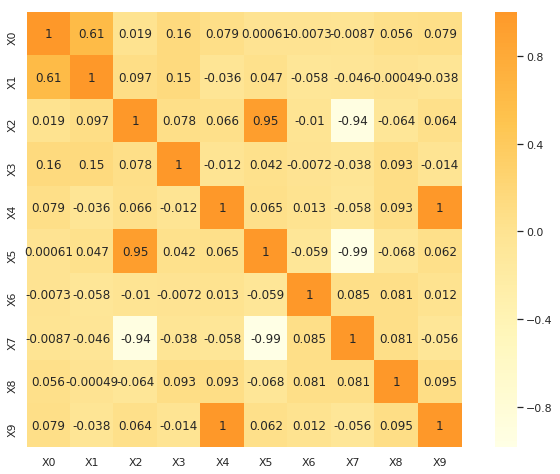

In [0]:
sns.heatmap(correlation_matrix, center=True, square=True, annot=True, cmap="YlOrBr");

Note como o mapa de calor acima reflete a matriz simétrica em `correlation_matrix`.

Como mostrado na legenda à direita, os retângulos mais escuros indicam alta correlação positiva (mais próxima de 1), enquanto os retângulos mais claros indicam alta correlação negativa (mais próxima de -1).

Por exemplo, podemos perceber que `X0` e `X1` possuem correlação positiva, bem como `X2` e `X5` e também `X4` e `X9`. Por outro lado, vemos que `X2` e `X7` possuem correlação negativa, da mesma forma que `X5` e `X7`. Sabemos que isso é verdade, pois os dados foram criados assim.

Note que os retângulos da diagonal principal possuem todos correlação igual a 1, pois $\rho_{X, X} = 1$.

## Visualização de dados

![data_visualization](https://www.columnfivemedia.com/wp-content/uploads/2018/03/How-to-use-data-visualization-report-design.png)

Agora entramos em uma das partes mais cruciais da EDA. O ser humano tem muito mais facilidade para compreender informação visual do que de qualquer outra forma. Por isso, é sempre bom que analisemos os dados do ponto de vista gráfico: isso nos permite ter _insights_ melhores sobre os nossos dados e também transmitir nossa análise a outras pessoas.

Existe uma gama muito grande de gráficos, e cada um fornece sua visão particular sobre os dados. É importante que se conheça o máximo deles e que se saiba interpretá-los corretamente. Aqui veremos alguns dos principais, mas qualquer boa biblioteca de visualização de dados também possui implementações dos outros.


O ecossistema do Python conta com um grande número de boas bibliotecas para visualização de dados. Alguns exemplos são:

O matplotlib é a "_engine_" padrão em Python para criação de gráficos e muitas ferramentas a utilizam por baixo dos panos para criarem suas próprias visualizações. O grande problema com o matplotlib é sua API não tão _friendly_. Ela exige muita customização e trabalho manual para gerar gráficos atraentes. Como resposta a comunidade criou bibliotecas que são _wrappers_ em torno do matplotlib, que facilitam a vida do usuário.

O pandas também possui ferramentas para visualização de dados, e isso é muito conveniente. Para visualizações corriqueiras, é interessante usarmos a mesma ferramenta que já utilizamos para manipulação dos dados. Mas tenha em mente que o pandas não é uma ferramenta de visualização. Se precisar de gráficos mais elaborados, terá que buscar em outras bibliotecas.

O seaborn é uma biblioteca de fácil uso, que conta com os principais tipos de gráficos. A sua API é bastante consistente e a qualidade das imagens finais é bem melhor quando comparada com o matplotlib puro. Ela é uma escolha confiável para quem busca facilidade de uso e agilidade para criação de gráficos.

Outras bibliotecas incríveis como plotly e bokeh também estão disponíveis. Além de gráficos estáticos, essas bibliotecas também permitem a criação de visualizações interativas, onde você pode interagir diretamente com a imagem (dar _zoom_, verificar valores em qualquer parte do gráfico, realizar filtros etc). Se essa for uma necessidade sua, vale a pena investigar tanto o plotly quanto o bokeh.

Nos exemplos a seguir, utilizaremos o matplotlib (apenas nos _scatter plots_), o próprio pandas e seaborn.

Por fim, é altamente recomendado que vocês conheçam o pacote ggplot2 para visualização de dados em R. Mesmo sem interesse em aprender R, essa biblioteca traz conhecimentos sobre uma teoria de visualização de dados chamada Gramática dos Gráficos, que é enriquecedor. Ao se basear nessa teoria, o ggplot2 conseguiu criar um _framework_ para criação de gráficos que é ao mesmo tempo consistente, flexível e elegante. Infelizmente, a comunidade de Python não conta com uma biblioteca ativa que compartilhe dessa mesma teoria até o momento.

![ggplot2](http://r-statistics.co/screenshots/ggplot_1.png)

### _Scatter plots_

Vamos começar nossos gráficos pelo tipo mais simples que é o _scatter plot_. O _scatter plot_ é basicamente um gráfico de dispersão de pontos em um plano. Certamente você já os viu.

Para tornar os gráficos mais interessantes, vamos melhorar nossos dados.

In [0]:
def partition(x):
  if 0 <= x <= 0.35:
    return "A"
  elif 0.35 < x <= 0.65:
    return "B"
  else:
    return "C"


dataframe["Class"] = dataframe["X0"].transform(partition)
dataframe["Color"] = dataframe["X1"].transform(lambda x: abs(floor(1000 * x)))
dataframe["Size"] = dataframe["X3"].transform(lambda x: abs(floor(1000 * x)))

dataframe.head(5)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Class,Color,Size
0,0.377286,0.319881,0.868301,0.084517,0.597278,3.640487,0.536591,-7.759413,0.236117,6.061414,B,319,84
1,0.531266,0.319801,0.062341,0.147739,0.133117,0.208639,0.844441,-0.433174,0.030472,1.261903,B,319,147
2,0.354147,-0.426301,0.104869,0.737405,0.182284,0.192600,0.840710,-0.774699,0.535336,1.816186,B,427,737
3,0.342927,0.091355,0.355104,0.648823,0.479582,1.264650,0.736822,-3.238344,0.586535,4.820349,A,91,648
4,0.378773,0.048785,0.899647,0.607555,0.244353,4.146366,0.330348,-7.971354,0.007534,2.559554,B,48,607


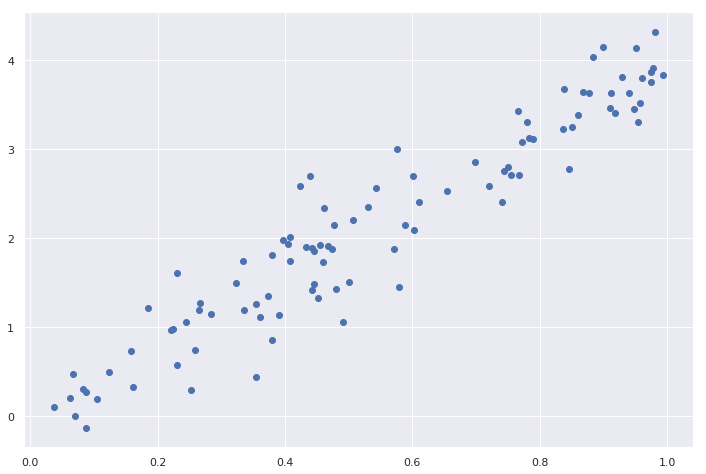

In [0]:
plt.plot(dataframe.X2, dataframe.X5, 'o'); # Usando matplotlib. O ';' evita saída textual do matplotlib.

Como dá pra perceber, a saída pura do matplotlib é muito crua. É exigido um pouco de customização e tentativa e erro para se criar gráficos melhores com o matplotlib.

Como a função `plot()` por padrão cria um gráfico de linhas (_line plot_ ou _line graph_), o matplotli também conta com uma função `scatter()` para criação específica de _scatter plots_:

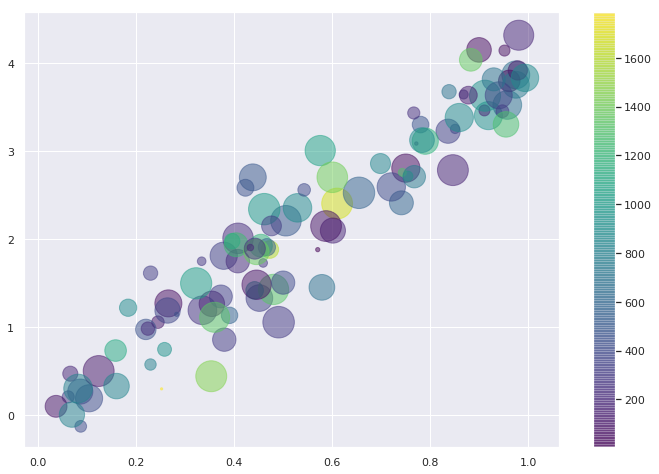

In [0]:
plt.scatter(dataframe.X2, dataframe.X5, c=dataframe.Color, s=dataframe.Size,
            alpha=0.5, cmap="viridis")
plt.colorbar();

Como toda função de gráfico, de toda biblioteca de visualização de dados, o `scatter()` aceita muitos parâmetros para customização do resultado final. No caso acima, utilizamos `c` e `s`, que nos permitem especificar mais eixos de visualização: uma variável representada pela cor e outra variável representada pelo tamanho, respectivamente.

O pandas também conta com uma API de visualização de dados:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


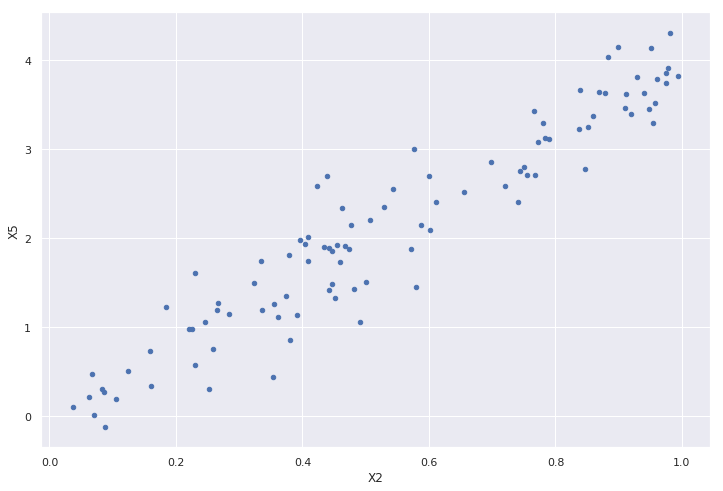

In [0]:
dataframe.plot.scatter(x="X2", y="X5"); # Com pandas (usando matplotlib por baixo).

O seaborn pega emprestado um pouco da sua API do ggplot2.

É possível especificar as variáveis direto pelos seus nomes, desde que o `DataFrame` seja especificado no parâmetro `data`:

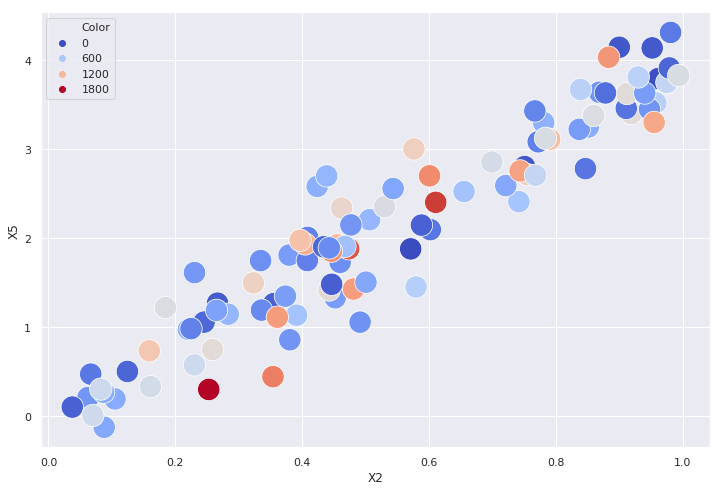

In [0]:
sns.scatterplot(data=dataframe, x="X2", y="X5", hue="Color", palette="coolwarm", s=500, alpha=1.0);

No seaborn, a variável representada pela cor é passada pelo parâmetro `hue`. O parâmetro `alpha` representa a transparência dos pontos.

Outra funcionalidade que é emprestada do ggplot2 é a possibilidade de criar _scatter plots_ com uma curva de regressão (e intervalos de confiança):

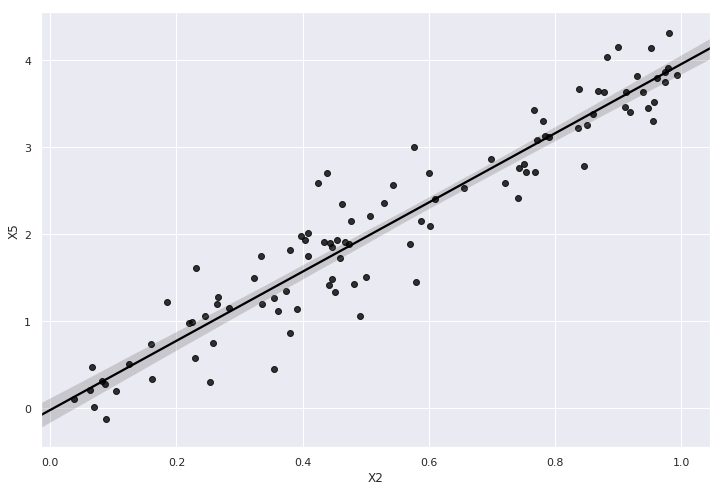

In [0]:
sns.regplot(data=dataframe, x="X2", y="X5", color="black");

### _Box plot_

_Box plots_ são gráficos para visualização da distribuição de uma variável através de seus quantis. Eles são uma forma ágil de enxergar a distribuição dos dados, sem ter que recorrer a histogramas ou gráficos de densidade.

O _box plot_ é um gráfico em forma de retângulo com barrinhas que se prolongam para fora dele. Para entendermos como funciona a análise de um _box plot_, vamos ver a figura abaixo (figura copiada [daqui](https://r4ds.had.co.nz/exploratory-data-analysis.html)):

![boxplot](https://d33wubrfki0l68.cloudfront.net/153b9af53b33918353fda9b691ded68cd7f62f51/5b616/images/eda-boxplot.png)

A análise do _box plot_ é como se segue:

1. A parte inferior do retângulo indica o primeiro quartil (Q1) ou 25º percentil.
2. A barra dividindo o retângulo indica a mediana ou segundo quartil (Q2) ou 50º percentil.
3. A parte superior do retângulo indica o terceiro quartil (Q3) ou 75º percentil.
4. A barrinha (_whisker_) inferior se prolonga até o menor valor que esteja dentro de $Q1 - 1.5 \text{IQR}$.
5. A barrinha (_whisker_) superior se prolonga até o maior valor que esteja dentro de $Q3 + 1.5 \text{IQR}$.
6. Qualquer observação fora desses limites é considerado um _outlier_ e deve ser indicado por um ponto.

Notem que entre a parte inferior do retângulo e sua parte superior temos exatamente IQR.

Através do _box plot_ podemos ter uma visão rápida do tipo de distribuição que estamos olhando: _skewness_, caudas, valores extremos etc.

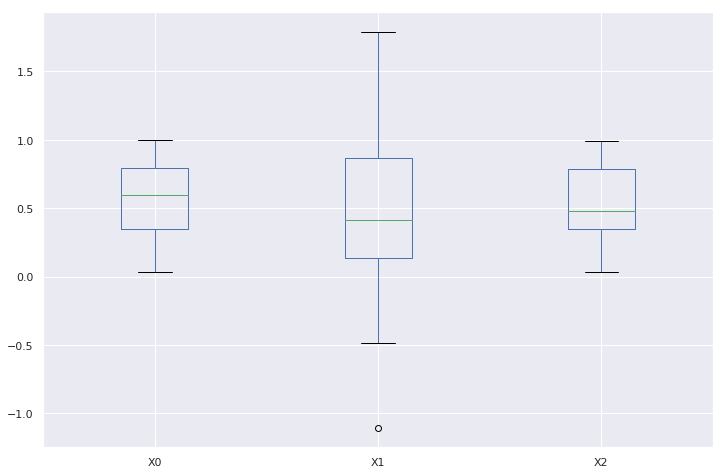

In [0]:
dataframe.boxplot(column=["X0", "X1", "X2"]); # Com pandas.

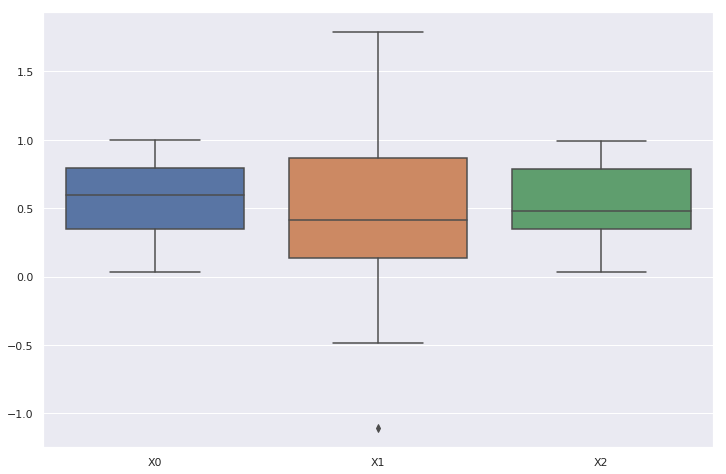

In [0]:
sns.boxplot(data=dataframe.loc[:, ["X0", "X1", "X2"]]); # Mesmo gráfico acima.

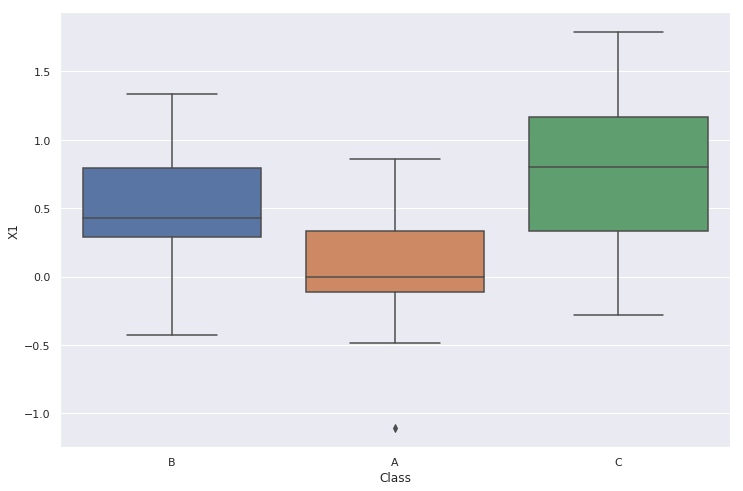

In [0]:
sns.boxplot(data=dataframe, x="Class", y="X1");

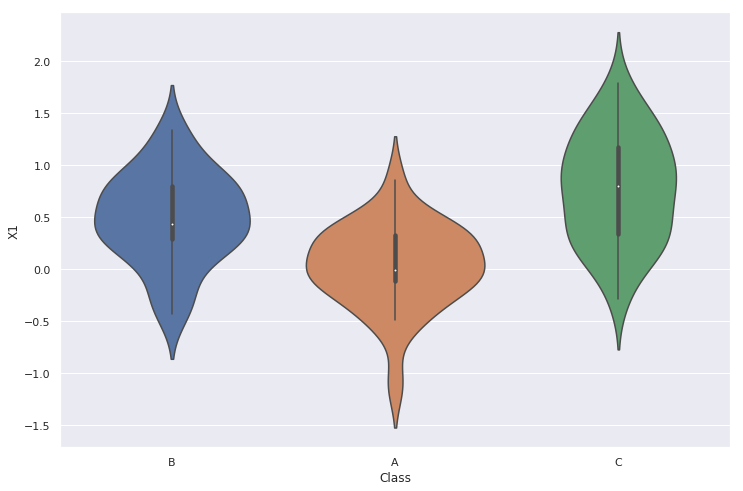

In [0]:
sns.violinplot(data=dataframe, x="Class", y="X1");

### Histograma

Agora veremos o histograma. Esse é um dos gráficos mais conhecidos e úteis na visualização de dados. O histograma nos dá uma boa ideia da distribuição dos dados, melhor ainda que o _box plot_.

Para construí-lo, primeiro separamos o _range_ de valores da variável em _buckets_, ou seja intervalos menores, de igual tamanho. A altura de cada retângulo em um _bucket_ é a contagem do número de observações que pertencem àquele _bucket_. Uma outra versão de histograma mostra as alturas dos retângulos normalizadas, ou seja, a altura é a frequência relativa das observações de forma que a soma total das alturas seja igual a 1.

Obviamente, quanto mais alto um _bucket_, mais observações ele contém (e mais denso ele é). Podemos ajustar o tamanho de cada _bucket_ e tornar o histograma mais ou menos granular. Algumas métricas sobre como regular o tamanho dos _buckets_ pode ser encontrada [aqui](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width).

Exemplo de histograma:

![histograma](https://www.mathworks.com/help/examples/matlab/win64/AdjustHistogramPropertiesExample_01.png)

Ao contrário do _box plot_ não é imediato ao olhar o histograma identificar seus quantis (Q1, mediana e Q3), nem mesmo valores que podem ser considerados _outliers_. Portanto, é sempre interessante observar os dois gráficos para cada variável.

O histograma é uma aproximação discreta da distribuição de probabilidade dos dados. Em geral, ele reflete bem a forma delineada pela função de densidade, que pode ser melhor estimada através do KDE (_Kernel Density Estimation_).

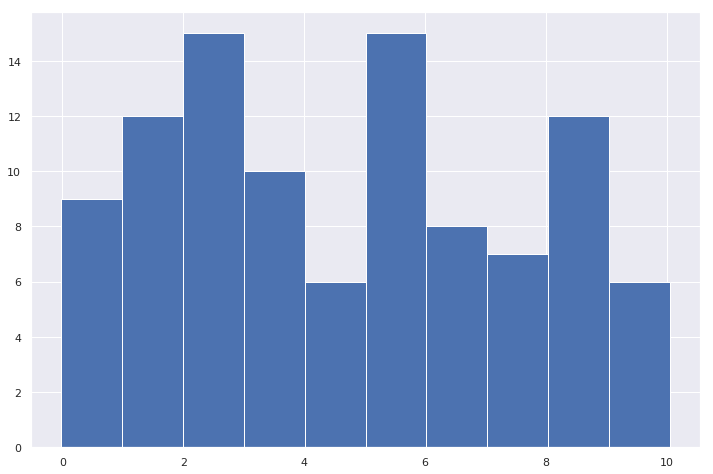

In [0]:
dataframe["X9"].hist(); # Com pandas.

Vamos criar uma amostra de 1000 valores retirados de uma distribuição normal padronizada:

In [0]:
normal_data = np.random.normal(size=1000)

Podemos ajustar o número de _buckets_ ou _bins_ para gerar uma visualização mais adequada:

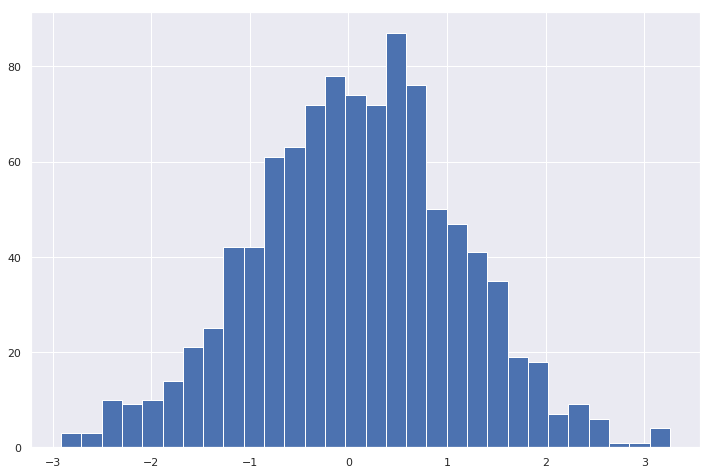

In [0]:
pd.Series(normal_data).hist(bins=30);

O seaborn permite uma riqueza maior de informação de forma tão simples quanto:

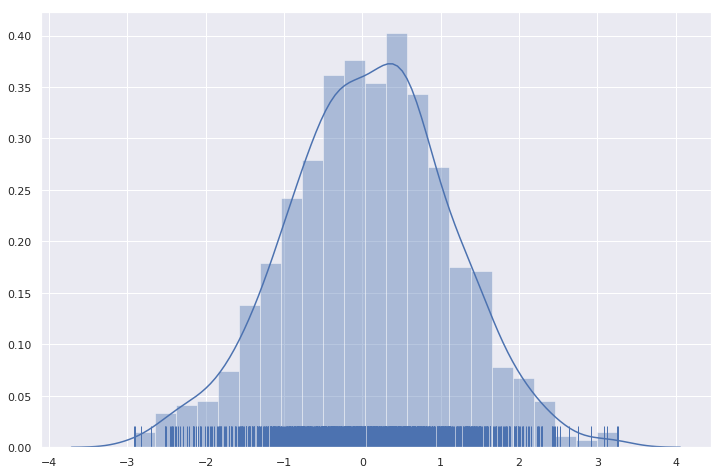

In [0]:
sns.distplot(normal_data, rug=True);

O histograma gerado pelo seaborn é bem interessante por apresentar a curva de KDE, que é uma estimação da verdadeira função de densidade dos dados, e os _rugs_ que são as pequenas marcas verticais na parte inferior do gráfico. Os _rugs_ indicam a densidade dos dados como se fossem um histograma 1D.

### _Bar plot_

O próximo tipo de gráfico que veremos é o _bar plot_. _Bar plots_ são comumente confundidos com histogramas. Nos histogramas, estamos interessados em apenas uma variável. No _bar plot_, queremos observar a relação entre uma variável qualitativa (categórica) e uma variável quantitativa (numérica).

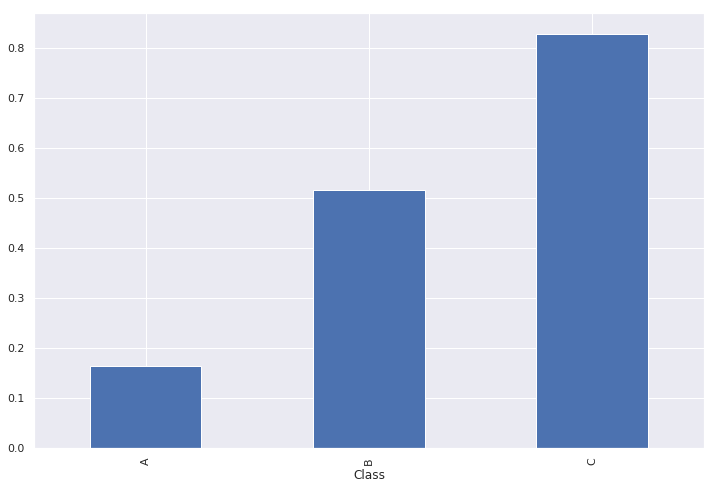

In [0]:
dataframe.groupby("Class").X0.mean().plot.bar(); # Com pandas.

No _bar plot_ do seaborn abaixo, cada classe (`A`, `B` e `C`) tem sua altura na média dos valores de `X0` caem dentro daquela classe. A barra vertical indica o intervalo de confiança gerado para aquela média.

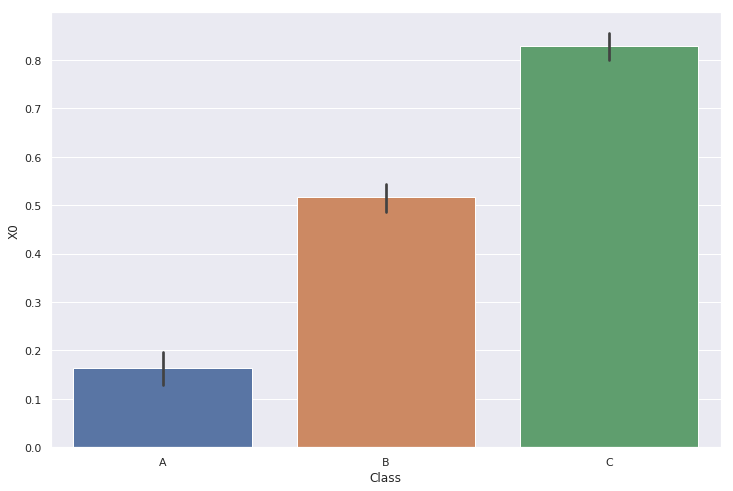

In [0]:
  sns.barplot(data=dataframe, x="Class", y="X0", order=list("ABC"));

A variável quantitativa do _bar plot_ pode ser qualquer métrica ou variável relacionada à variável categórica. Um caso bastante usual é ser a própria contagem do numéro de ocorrência de cada classe da variável categórica. Nesse caso, cada retângulo indica a quantidade de observações naquele _bucket_, que novamente pode ser absoluta (contagem) ou relativo (frequência relativa). Mas agora os _buckets_ são as categorias da variável.

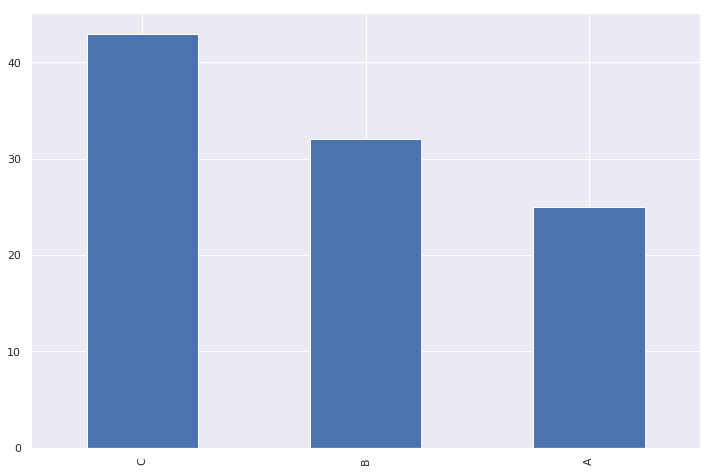

In [0]:
dataframe.Class.value_counts().plot(kind='bar');

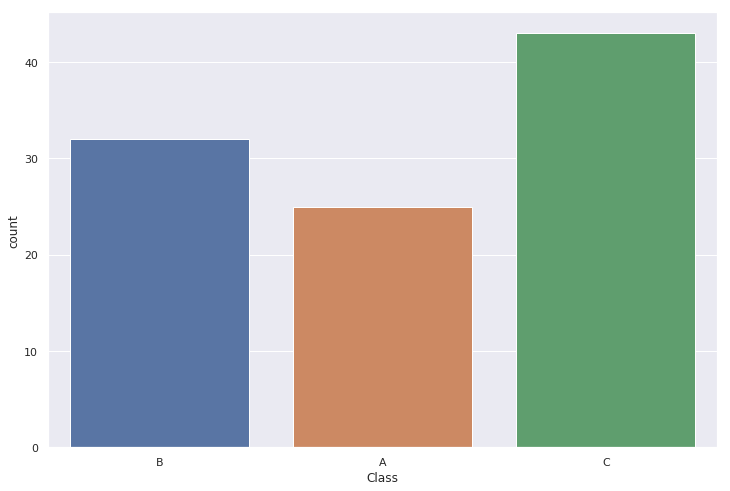

In [0]:
sns.countplot(data=dataframe, x="Class");

### Visualização em pares

O seaborn tem algumas funções que facilitam o _plot_ de múltiplas visualizações juntas. Uma delas é o _pairplot_.

Vamos ver como ela funciona com um exemplo.

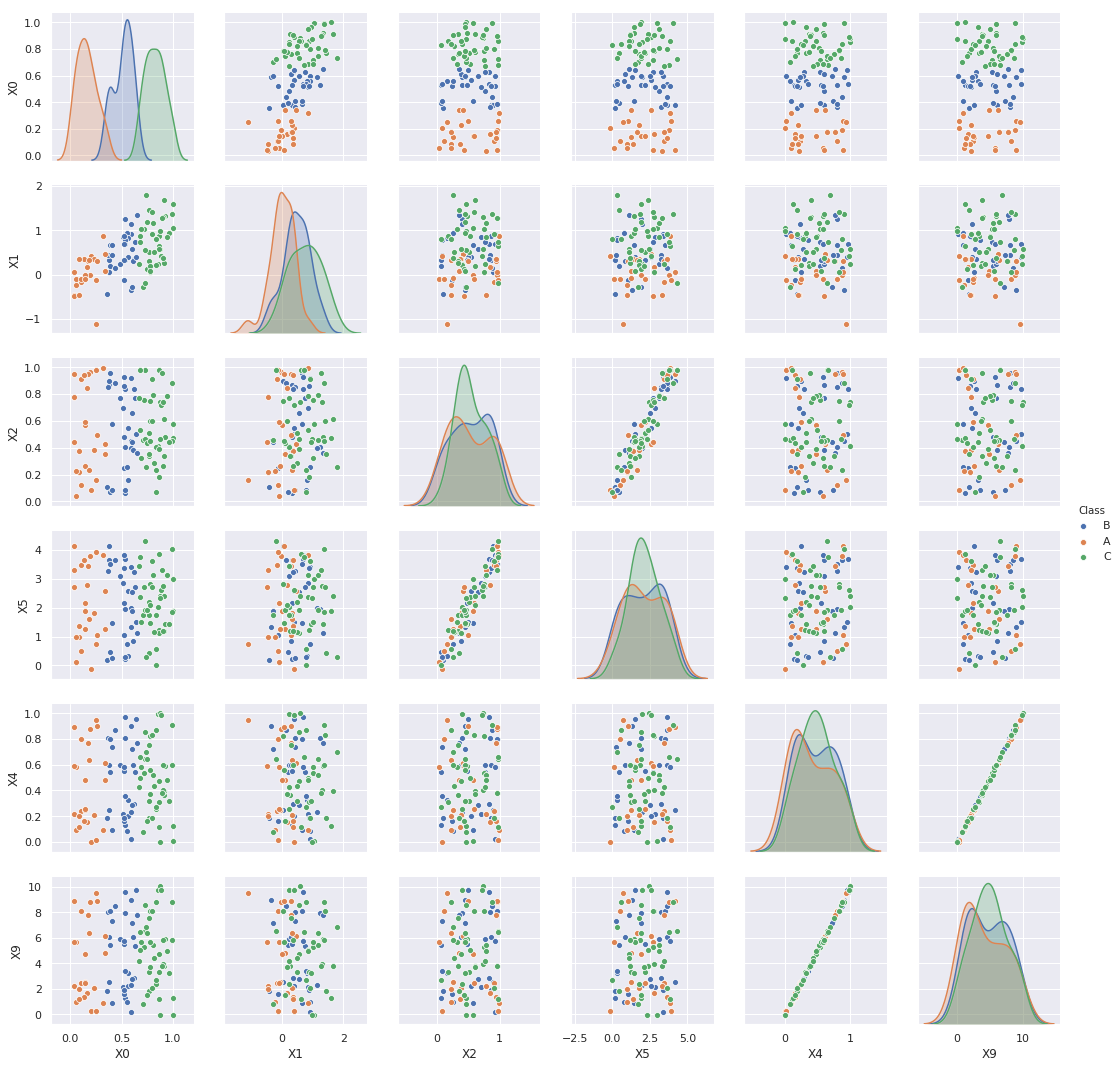

In [0]:
sns.pairplot(data=dataframe, vars=["X" + i for i in list("012549")], hue="Class");

Para visualizações de múltiplos _plots_ ao mesmo tempo, o seaborn também provê suas classes de _grid_: _PairGrid_, _FacetGrid_ e _JointGrid_. Elas podem ser bastante úteis quando precisamos sumarizar diversos gráficos relacionados em pouco espaço.

Se uma customização mais granular precisa ser feita, o matplotlib é a solução. Ele contém uma API de _subplots_ que permite ajustar os _canvas_ dos gráficos nos seus míniimos detalhes, ao custo de um significativo trabalho manual.

## Referências

* [How to self-learn statistics of data science](https://medium.com/ml-research-lab/how-to-self-learn-statistics-of-data-science-c05db1f7cfc3)

* [Statistics Done Wrong](https://www.statisticsdonewrong.com/)

* [Exploratory Data Analysis](https://r4ds.had.co.nz/exploratory-data-analysis.html)

* [NIST - Exploratory Data Analysis](https://www.itl.nist.gov/div898/handbook/eda/eda.htm)

* [A Gentle Introduction to Exploratory Data Analysis](https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184)

* [A Simple Tutorial on Exploratory Data Analysis](https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis)

* [Introduction to Hypothesis Testing](https://www.sagepub.com/sites/default/files/upm-binaries/40007_Chapter8.pdf)

* [The Power of Visualization](https://towardsdatascience.com/the-power-of-visualization-in-data-science-1995d56e4208)

* [15 Stunning Data Visualizations (And What You Can Learn From Them)](https://visme.co/blog/examples-data-visualizations/)

* [Spurious Correlations](https://www.tylervigen.com/spurious-correlations)

* [matplotlib tutorials](https://matplotlib.org/tutorials/index.html)

* [pandas visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

* [seaborn API](https://seaborn.pydata.org/api.html)
